# 2021-12_PKU_TCAconversion

Meausred OD290, which is linearly correlated with concentration of TCA.
Phe is converted into TCA by PAL enzyme, whose activity is enhanced by PheP importer.
'Activated biomass' was produced and then tested for ability to convert Phe to TCA following protocols received from Synlogic. These data are the replicates from three separate days of experiments (2021-01-12, -13, -14)

In [1]:
# Matplotlib interactivity
#matplotlib notebook
import matplotlib
matplotlib.rc('figure', dpi = 160)
matplotlib.rcParams['pdf.fonttype'] = 42 # for making font editable when exported to PDF for Illustrator
matplotlib.rcParams['ps.fonttype'] = 42 # for making font editable when exported to PS for Illustrator

# Set the default sans-serif font to Arial"
matplotlib.rcParams['font.sans-serif'] = "Arial"
# Set to always use sans-serif fonts
matplotlib.rcParams['font.family'] = "sans-serif"

In [2]:
# Imports
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sys
import cytoflow as flow
import string
import pandas as pd
import pickle
from scipy.optimize import least_squares
from matplotlib.lines import Line2D
from scipy.stats import linregress

## Data Import

In [39]:
# Renaming the file as "file"
file = '/Users/atriassi/Dropbox (Personal)/Education/Grad School/*Papers/Data_fromSynlogic/12-3-2021  Triassi-Voigt-Synlogic Paper - Data for Figure 3.xlsx'
sheets = ['Time vs TCA-tidy', 'OD600 vs IPTG Conc-tidy']

# Getting data as dataframe
xl = pd.read_excel(file, sheet_name = sheets, header = 0, fill_value = 0)


In [4]:
xl['Time vs TCA-tidy']

,strain_num,inducer,inducer_conc,replicate,time,tca_conc
0,AJT462,iptg,0,1,0,0.033480
1,AJT462,iptg,0,1,30,0.054419
2,AJT462,iptg,0,1,60,0.129556
3,AJT462,iptg,0,1,90,0.121085
4,AJT462,iptg,0,1,120,0.092616
5,AJT462,iptg,0,2,0,0.015185
6,AJT462,iptg,0,2,30,0.027693
7,AJT462,iptg,0,2,60,0.110466
8,AJT462,iptg,0,2,90,0.084814
9,AJT462,iptg,0,2,120,0.086657


In [5]:
data= xl['Time vs TCA-tidy']


strains = sorted(data['strain_num'].unique())
inducers = sorted(data['inducer'].unique())
iptg_conc = sorted(data['inducer_conc'].unique())
replicate = sorted(data['replicate'].unique())
time = sorted(data['time'].unique())

print(strains, inducers, iptg_conc, replicate, time)


['AJT462', 'AJT463'] ['iptg'] [0, 5, 15, 25, 40, 70, 200, 1000] [1, 2, 3] [0, 30, 60, 90, 120]


In [6]:
inducer_info = {'iptg': {'conc': iptg_conc}}#,
#                'ohc14': {'conc': ohc14}}

# promoters = ['P$_\mathrm{Tac}$','P$_\mathrm{Cin}$', 'P$_\mathrm{PhlF}$',
#              'P$_\mathrm{LitR}$','P$_\mathrm{PsrA}$']

fig_pos = {'AJT462': {'fig_row': 0,'fig_col':0},
           'AJT463': {'fig_row': 0,'fig_col':1}}

strain_info = {'AJT462': {'color': '#FAAF3B',
                         'promoter': 'P$_\mathrm{Tac}$', #$_\mathrm{}$ allows for subscript without italics
                         'inducer':'iptg',
                          'design':'D1'},
               'AJT463': {'color': '#7BC129',
                         'promoter': 'P$_\mathrm{PhlF}$', #$_\mathrm{}$ allows for subscript without italics
                         'inducer':'iptg',
                          'design':'D1'}}

rep_info = {'1': {'marker': 'o',
                   'facecolor': 'white',
                   'edgecolor': 'black',
                   'linecolor': 'black'},
            '2': {'marker': 'o',
                   'facecolor': 'white',
                    'edgecolor': 'grey',
                   'linecolor': 'grey'},
            '3': {'marker': 'o',
                   'facecolor': 'white',
                    'edgecolor': 'darkgrey',
                    'linecolor': 'darkgrey'}}


In [7]:
# data.loc[data
#          [
#              (data['strain_num']=='AJT462') &
#              (data['inducer']=='iptg') &
#              (data['inducer_conc']==1000) &
#              (data['replicate']==1)
#              ], 'tca_conc'
#         ]

data[(data['strain_num']=='AJT462') &
     (data['inducer']=='iptg') &
     (data['inducer_conc']==1000) &
     (data['replicate']==1)
     ].loc[:,'tca_conc']


# TCA_data_TF_r1['AJT462']['M9']['iptg'][1000].loc[:,'TCA (mM)']

105    0.117404
106    0.681852
107    1.263819
108    1.927950
109    2.062620
Name: tca_conc, dtype: float64

In [8]:
grouped_df = data.groupby(['strain_num','inducer','inducer_conc', 'time'], as_index=False).agg([np.mean, np.std])


grouped_df = grouped_df['tca_conc']
grouped_df = grouped_df.reset_index()

grouped_df

,strain_num,inducer,inducer_conc,time,mean,std
0,AJT462,iptg,0,0,0.020257,0.011554
1,AJT462,iptg,0,30,0.036602,0.015430
2,AJT462,iptg,0,60,0.113011,0.015430
3,AJT462,iptg,0,90,0.096268,0.021513
4,AJT462,iptg,0,120,0.085598,0.007603
5,AJT462,iptg,5,0,0.215521,0.029057
6,AJT462,iptg,5,30,0.105962,0.019374
7,AJT462,iptg,5,60,0.218165,0.031492
8,AJT462,iptg,5,90,0.276827,0.030583
9,AJT462,iptg,5,120,0.396479,0.017853


In [63]:
grouped_df[grouped_df['inducer_conc']==0]

,strain_num,inducer,inducer_conc,time,mean,std
0,AJT462,iptg,0,0,0.020257,0.011554
1,AJT462,iptg,0,30,0.036602,0.015430
2,AJT462,iptg,0,60,0.113011,0.015430
3,AJT462,iptg,0,90,0.096268,0.021513
4,AJT462,iptg,0,120,0.085598,0.007603
40,AJT463,iptg,0,0,0.163470,0.045220
41,AJT463,iptg,0,30,1.030416,0.106431
42,AJT463,iptg,0,60,1.557941,0.526527
43,AJT463,iptg,0,90,2.088004,0.064151
44,AJT463,iptg,0,120,2.141312,0.149005


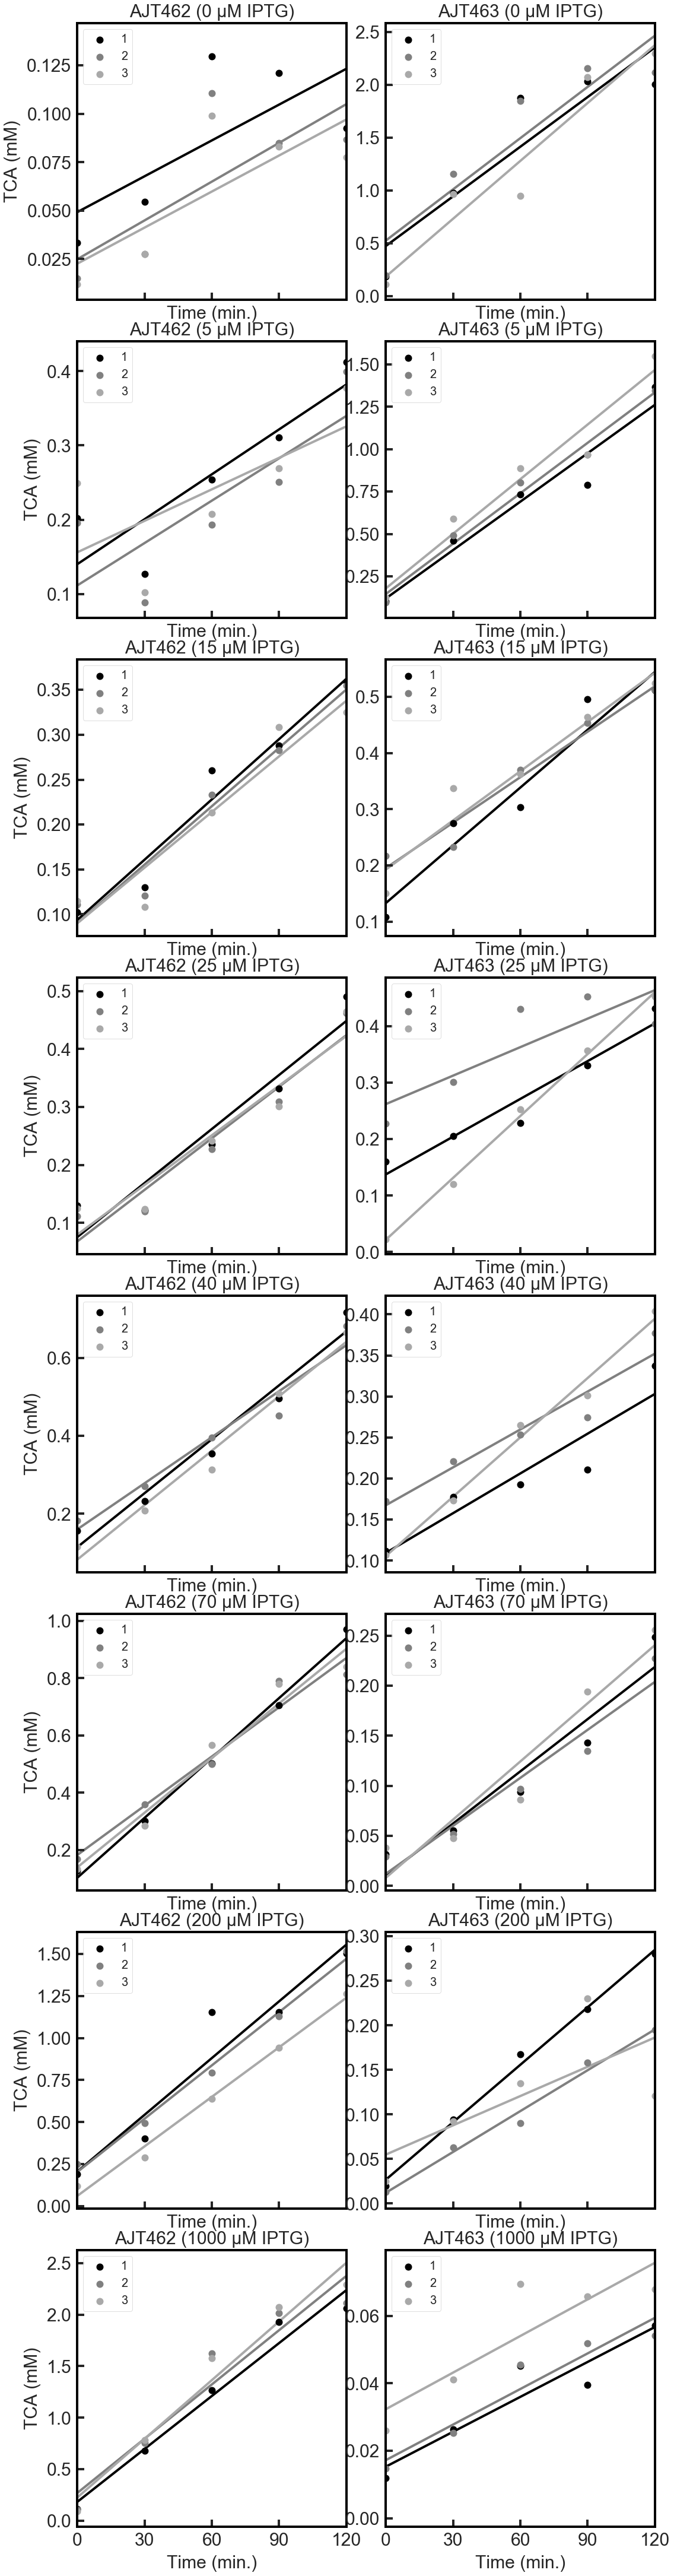

In [9]:
rows = 8
cols = 2

fig, ax = plt.subplots(rows,cols, figsize=(7.5*cols, 7.5*rows),sharex = 'col')
plt.tight_layout(pad = 4, h_pad = 6, w_pad = 4) #tidies up spacing between plots

results = dict()

for s in strains:
    results[s] = dict()
    for c in iptg_conc:
        results[s][c] = dict()
        for r in replicate:

            # set figure position within subplot
            FP = ax[iptg_conc.index(c)][strains.index(s)]

            # make plot borders black and specified thickness
            for spine in FP.spines.values():
                spine.set_edgecolor('black')
                spine.set_linewidth(4)

                
            x = data[(data['strain_num']== s) &
                (data['inducer_conc']== c) &
                (data['replicate']== r)
                ].loc[:,'time']

                            
            y = data[(data['strain_num']== s) &
                (data['inducer_conc']== c) &
                (data['replicate']== r)
                ].loc[:,'tca_conc']
            
            
            r = r.astype(str)
            
            # calculate slope of best-fit line through the points
            results[s][c][r] = linregress(x, y)

            # plot data
            FP.scatter(x, y, color = rep_info[r]['edgecolor'], zorder = 1,
               edgecolors = rep_info[r]['edgecolor'], linewidths = 2, marker = rep_info[r]['marker'], s = 100,
                      label = '{}'.format(r))

            # plot best-fit line
            y_fit = results[s][c][r].intercept + results[s][c][r].slope*pd.Series(time)# time needed to be a Series instead of a list to do multiplication without doing list comprehension to multiply each value
            FP.plot(x, y_fit, color = rep_info[r]['linecolor'], zorder=0,
                    linewidth = 4)

    #         FP.plot(time, data_TCA[s][m][1].loc[:,'TCA (mM)'], color = strain_info[s]['color'],
    #            marker = 'o', ms = 10, linewidth = 4,
    #                 label = '{} ({}) - {}'.format(strain_info[s]['promoter'],m,s))


            FP.grid(False)
            FP.set_title('{} ({} \u03BCM IPTG)'.format(s,c), size = 30, pad = 10)
#                         if fig_pos[strain_info[s]['design']]['fig_col'] == 0:
            FP.set_xlabel('Time (min.)', size = 30, labelpad = 10)

    
#             if s == 'AJT462':
#                 FP.set_ylim(-0.1,0.4)
#             if s == 'AJT463':
#                 FP.set_ylim(-0.1,1)
                
            FP.set_xlim(0,120)

            if strains.index(s) == 0:
                FP.set_ylabel('TCA (mM)', size = 30, labelpad = 10)

            FP.tick_params(labelsize = 30, length = 12, width = 4, direction = 'in', pad = 10)
            FP.set_xticks(time)
    #         FP.tick_params(which='minor', length = 6, width = 4, direction = 'in')

            FP.legend(markerscale = 1, fontsize = 20)

# fig.delaxes(ax[0][2])

In [10]:
# fig.savefig('AJT462_463_TCAconversion_Time_x_TCA_EachReplicate.pdf', bbox_inches = "tight", transparent = True)

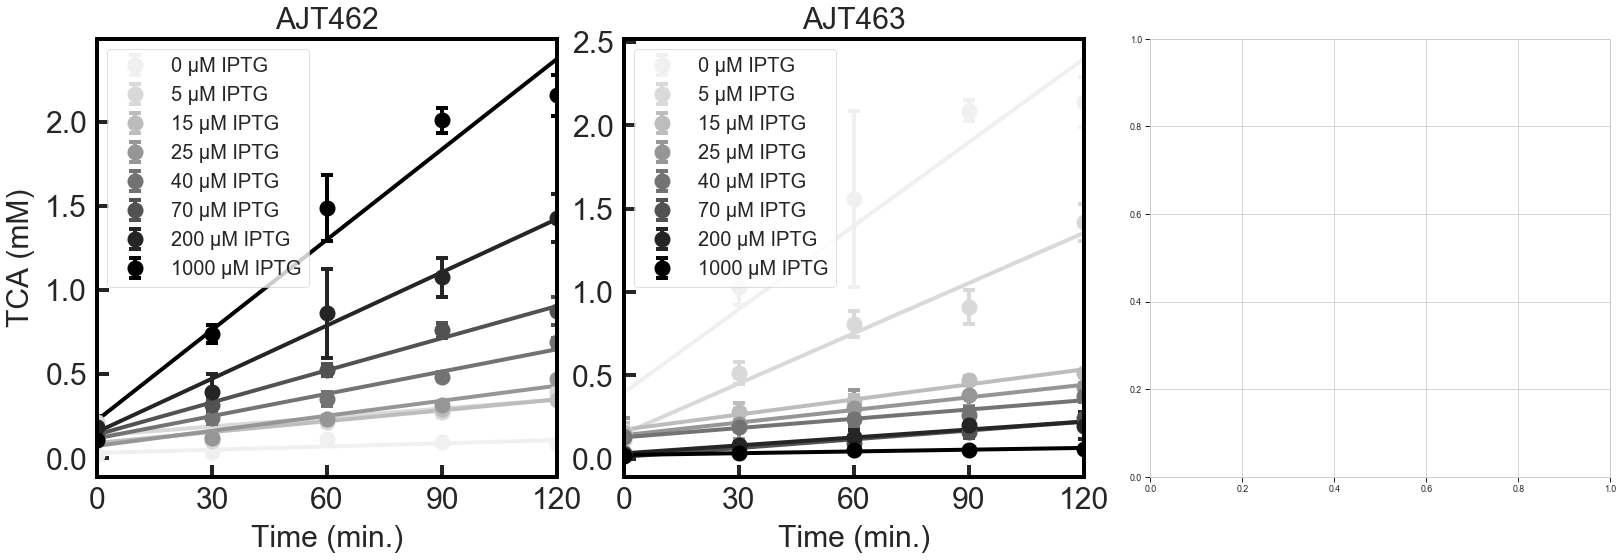

In [11]:
grays = ['#f0f0f0','#d9d9d9','#bdbdbd','#969696','#737373','#525252','#252525','#000000']

rows = 1
cols = 3

fig_means, ax_means = plt.subplots(rows,cols, figsize=(7.5*cols, 7.5*rows),sharex = 'col')
plt.tight_layout(pad = 4, h_pad = 6, w_pad = 4) #tidies up spacing between plots

results = dict()

for s in strains:
    results[s] = dict()
    for c in iptg_conc:

        # set figure position within subplot
        FP = ax_means[strains.index(s)]

        # make plot borders black and specified thickness
        for spine in FP.spines.values():
            spine.set_edgecolor('black')
            spine.set_linewidth(4)

        x_means = grouped_df[(grouped_df['strain_num']== s) &
                (grouped_df['inducer_conc']== c)
                ].loc[:,'time']

                            
        y_means = grouped_df[(grouped_df['strain_num']== s) &
            (grouped_df['inducer_conc']== c)
            ].loc[:,'mean']
        
        y_std = grouped_df[(grouped_df['strain_num']== s) &
            (grouped_df['inducer_conc']== c)
            ].loc[:,'std']
        
            
        # calculate slope of best-fit line through the points
        results[s][c] = linregress(x_means, y_means)

        # plot data
        FP.errorbar(x_means, y_means, yerr = y_std,
                    mfc = grays[iptg_conc.index(c)], zorder = 1, mec = grays[iptg_conc.index(c)], 
                    mew = 4, marker = 'o', ms = 12, linewidth = 0,
                    ecolor = grays[iptg_conc.index(c)], elinewidth = 4, capsize = 6, capthick = 4,
                    label = '{} \u03BCM IPTG'.format(c))

        # plot best-fit line
        y_fit = results[s][c].intercept + results[s][c].slope*pd.Series(time)# time needed to be a Series instead of a list to do multiplication without doing list comprehension to multiply each value
        FP.plot(time, y_fit, color = grays[iptg_conc.index(c)], zorder=0,
                linewidth = 4)

#         FP.plot(time, data_TCA[s][m][1].loc[:,'TCA (mM)'], color = strain_info[s]['color'],
#            marker = 'o', ms = 10, linewidth = 4,
#                 label = '{} ({}) - {}'.format(strain_info[s]['promoter'],m,s))


        FP.grid(False)
        FP.set_title(s, size = 30, pad = 10)
#                         if fig_pos[strain_info[s]['design']]['fig_col'] == 0:
        FP.set_xlabel('Time (min.)', size = 30, labelpad = 10)

#         if s == 'AJT437':
#                 FP.set_ylim(-0.1,3)
#         if s == 'AJT462':
#             FP.set_ylim(-0.1,0.4)
#         if s == 'AJT463':
#             FP.set_ylim(-0.1,1)
                
        FP.set_xlim(0,120)

        if strains.index(s) == 0:
            FP.set_ylabel('TCA (mM)', size = 30, labelpad = 10)

        FP.tick_params(labelsize = 30, length = 12, width = 4, direction = 'in', pad = 10)
        FP.set_xticks(time)
#         FP.tick_params(which='minor', length = 6, width = 4, direction = 'in')

        FP.legend(markerscale = 1, fontsize = 20)

# fig.delaxes(ax[0][2])

In [12]:
# fig_means.savefig('AJT462_463_TCAconversion_Time_x_TCA_ErrorBars.pdf', bbox_inches = "tight", transparent = True)

In [13]:
## Function to adjust figure size to make actual axes certain size
# from https://stackoverflow.com/questions/44970010/axes-class-set-explicitly-size-width-height-of-axes-in-given-units

def set_size(w,h, ax=None):
    """ w, h: width, height in inches """
    if not ax: ax=plt.gca()
    l = ax.figure.subplotpars.left
    r = ax.figure.subplotpars.right
    t = ax.figure.subplotpars.top
    b = ax.figure.subplotpars.bottom
    figw = float(w)/(r-l)
    figh = float(h)/(t-b)
    ax.figure.set_size_inches(figw, figh)

In [29]:
from sklearn.linear_model import LinearRegression

/usr/local/lib/python3.6/site-packages/matplotlib/_constrained_layout.py:226: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
/usr/local/lib/python3.6/site-packages/matplotlib/_constrained_layout.py:226: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
/usr/local/lib/python3.6/site-packages/matplotlib/_constrained_layout.py:226: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
/usr/local/lib/python3.6/site-packages/matplotlib/_constrained_layout.py:226: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
/usr/local/lib/python3.6/site-packages/matplotlib/_constrained_layout.py:226: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
/usr/local/lib/python3.6/site-packages/matplotlib/_constrained_layout.py:226: UserWarning: constrained_layout not a

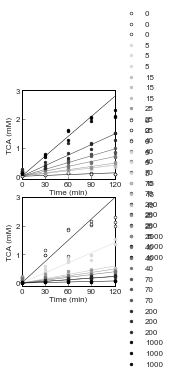

In [109]:
# from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)

# rows = 3
# cols = 1

# fig_means2, ax_means2 = plt.subplots(rows,cols, figsize=(2.5*cols,1.5*rows), sharey = 'row', constrained_layout = True)
# # plt.tight_layout(h_pad = 0) #tidies up spacing between plots

# results = dict()

# for s in strains:
#     results[s] = dict()
#     for c in iptg_conc:

#         # set figure position within subplot
#         FP = ax_means2[strains.index(s)]
# #         FP.set_aspect('equal', adjustable = 'box') 

#         # make plot borders black and specified thickness
#         for spine in FP.spines.values():
#             spine.set_edgecolor('black')
#             spine.set_linewidth(1)

#         # calculate slope of best-fit line through the points
#         results[s][c] = linregress(time, TCA_data_means[s][c]['means'].astype(float))

#         if c == 0:
#             FP.errorbar(time, TCA_data_means[s][c]['means'], yerr = TCA_data_means[s][c]['stdevs'],
#                     mfc = 'white', zorder = 1, mec = 'black', mew = 0.5,
#                     marker = 'o', ms = 2, linewidth = 0,
#                     ecolor = 'black', elinewidth = 0.5, capsize = 1, capthick = 0.5,
#                     label = '{} \u03BCM IPTG'.format(c))
            
#             y_fit = results[s][c].intercept + results[s][c].slope*pd.Series(time)# time needed to be a Series instead of a list to do multiplication without doing list comprehension to multiply each value
#             FP.plot(time, y_fit, color = 'black', zorder=0,
#                 linewidth = 0.5)
            
        
#         # plot data
#         if c != 0:
#             FP.errorbar(time, TCA_data_means[s][c]['means'], yerr = TCA_data_means[s][c]['stdevs'],
#                     mfc = grays[iptg_conc.index(c)], zorder = 1, mec = grays[iptg_conc.index(c)], mew = 0.5,
#                     marker = 'o', ms = 2, linewidth = 0,
#                     ecolor = grays[iptg_conc.index(c)], elinewidth = 0.5, capsize = 1, capthick = 0.5,
#                     label = '{} \u03BCM IPTG'.format(c))

#             # plot best-fit line
#             y_fit = results[s][c].intercept + results[s][c].slope*pd.Series(time)# time needed to be a Series instead of a list to do multiplication without doing list comprehension to multiply each value
#             FP.plot(time, y_fit, color = grays[iptg_conc.index(c)], zorder=0,
#                     linewidth = 0.5)

# #         FP.plot(time, data_TCA[s][m][1].loc[:,'TCA (mM)'], color = strain_info[s]['color'],
# #            marker = 'o', ms = 10, linewidth = 4,
# #                 label = '{} ({}) - {}'.format(strain_info[s]['promoter'],m,s))


#         FP.grid(False)
# #         FP.set_title(s, size = 30, pad = 10)
# #                         if fig_pos[strain_info[s]['design']]['fig_col'] == 0:
#         FP.set_xlabel('Time (min.)', size = 8, labelpad = 2)

#         if s == 'AJT437':
#             FP.set_ylim(-0.1,3)
#             FP.yaxis.set_major_locator(MultipleLocator(0.5))
#             FP.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
#             FP.yaxis.set_minor_locator(MultipleLocator(0.1))
#         if s == 'AJT462':
#             FP.set_ylim(-0.013,0.4)
#             FP.yaxis.set_major_locator(MultipleLocator(0.1))
#             FP.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
#         if s == 'AJT463':
#             FP.set_ylim(-0.033,1)
#             FP.yaxis.set_major_locator(MultipleLocator(0.5))
#             FP.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
#             FP.yaxis.set_minor_locator(MultipleLocator(0.1))
            
#         FP.set_xlim(0,120)

# #         if strains.index(s) == 0:
#         FP.set_ylabel('TCA (mM)', size = 8, labelpad = 2)
    
# #         FP.yaxis.set_major_locator(MultipleLocator(0.5))
# #         FP.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
# #         FP.yaxis.set_minor_locator(MultipleLocator(0.1))

#         FP.tick_params(labelsize = 8, length = 3, width = 0.5, direction = 'in', pad = 2)
#         FP.set_xticks(time)
#         FP.tick_params(which='minor', length = 2, width = 0.5, direction = 'in')

#         FP.legend(markerscale = 1, fontsize = 7, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., frameon = False)
        
# #         set_size(2,2)
# # plt.show()

from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)

rows = 2
cols = 1

fig_means2, ax_means2 = plt.subplots(rows,cols, figsize=(2.5*cols*2/3,1.8*rows), sharey = 'row', constrained_layout = True)
# plt.tight_layout(h_pad = 0) #tidies up spacing between plots

results = dict()
# model= dict()
results_reps = dict()

for s in strains:
    results[s] = dict()
    results_reps[s] = dict()
#     model[s] = dict()
    for c in iptg_conc:
        results_reps[s][c] = dict()

        # set figure position within subplot
        FP = ax_means2[strains.index(s)]
#         FP.set_aspect('equal', adjustable = 'box') 

        # make plot borders black and specified thickness
        for spine in FP.spines.values():
            spine.set_edgecolor('black')
            spine.set_linewidth(1)


        x_means = grouped_df[(grouped_df['strain_num']== s) &
                (grouped_df['inducer_conc']== c)
                ].loc[:,'time']

                            
        y_means = grouped_df[(grouped_df['strain_num']== s) &
            (grouped_df['inducer_conc']== c)
            ].loc[:,'mean']
        
        y_std = grouped_df[(grouped_df['strain_num']== s) &
            (grouped_df['inducer_conc']== c)
            ].loc[:,'std']
        
        # calculate slope of best-fit line through the points
        # if statements because Chris wanted to fix fits to (0,0) and wanted to exclude rightmost points for full induction
        
        results[s][c] = LinearRegression(fit_intercept=False)
#         model[s][c].fit(new_x[:, np.newaxis], new_y)

#         xfit = np.linspace(0, 10, 1000)
#         yfit = model.predict(xfit[:, np.newaxis])
        
        if s=='AJT462' and c==1000:
            new_x = x_means[:-1]
            new_y = pd.Series([0]).append(y_means[1:-1])
            results[s][c].fit(new_x[:, np.newaxis], new_y)
#             results[s][c] = linregress(x_means[:-1], pd.Series([0]).append(y_means[1:-1]))
            
        elif s=='AJT463' and c==0:
            new_x = x_means[:-1]
            new_y = pd.Series([0]).append(y_means[1:-1])
            results[s][c].fit(new_x[:, np.newaxis], new_y)
            #             results[s][c] = linregress(x_means[:-1], pd.Series([0]).append(y_means[1:-1]))
            
        else:
            new_x = x_means
            new_y = pd.Series([0]).append(y_means[1:])
            results[s][c].fit(new_x[:, np.newaxis], new_y)
#             results[s][c] = linregress(x_means, pd.Series([0]).append(y_means[1:]))
        
#         results[s][c] = linregress(x_means, y_means)

## COMMENTED OUT BELOW
        
        for r in replicate:

            x = data[(data['strain_num']== s) &
                (data['inducer_conc']== c) &
                (data['replicate']== r)
                ].loc[:,'time']


            y = data[(data['strain_num']== s) &
                (data['inducer_conc']== c) &
                (data['replicate']== r)
                ].loc[:,'tca_conc']
            
       
#         # plot data
#         FP.errorbar(x_means, y_means, yerr = y_std,
#                     mfc = grays[iptg_conc.index(c)], zorder = 1, mec = grays[iptg_conc.index(c)], 
#                     mew = 4, marker = 'o', ms = 12, linewidth = 0,
#                     ecolor = grays[iptg_conc.index(c)], elinewidth = 4, capsize = 6, capthick = 4,
#                     label = '{} \u03BCM IPTG'.format(c))

#         # plot best-fit line
#         y_fit = results[s][c].intercept + results[s][c].slope*pd.Series(time)# time needed to be a Series instead of a list to do multiplication without doing list comprehension to multiply each value
#         FP.plot(time, y_fit, color = grays[iptg_conc.index(c)], zorder=0,
#                 linewidth = 4)

            # made separate variable for calculating rates of each replicate so I can report a standard deviation
            results_reps[s][c][r] = LinearRegression(fit_intercept=False)
    #         model[s][c].fit(new_x[:, np.newaxis], new_y)

    #         xfit = np.linspace(0, 10, 1000)
    #         yfit = model.predict(xfit[:, np.newaxis])

            if s=='AJT462' and c==1000:
                new_x = x[:-1]
                new_y = pd.Series([0]).append(y[1:-1])
#                 results_reps[s][c][r].fit(new_x[:, np.newaxis], new_y)
    #             results[s][c] = linregress(x_means[:-1], pd.Series([0]).append(y_means[1:-1]))

            elif s=='AJT463' and c==0:
                new_x = x[:-1]
                new_y = pd.Series([0]).append(y[1:-1])
#                 results_reps[s][c][r].fit(new_x[:, np.newaxis], new_y)
                #             results[s][c] = linregress(x_means[:-1], pd.Series([0]).append(y_means[1:-1]))

            else:
                new_x = x
                new_y = pd.Series([0]).append(y[1:])
            
            results_reps[s][c][r].fit(new_x[:, np.newaxis], new_y)

            y_fit_reps = results_reps[s][c][r].intercept_ + results_reps[s][c][r].coef_[0]*pd.Series(time)# time needed to be a Series instead of a list to do multiplication without doing list comprehension to multiply each value
        
        
            if c == 0:
    #             FP.errorbar(time, TCA_data_means[s][c]['means'], yerr = TCA_data_means[s][c]['stdevs'],
    #                     mfc = 'white', zorder = 1, mec = 'black', mew = 0.5,
    #                     marker = 'o', ms = 2, linewidth = 0,
    #                     ecolor = 'black', elinewidth = 0.5, capsize = 1, capthick = 0.5,
    #                     label = '{} \u03BCM IPTG'.format(c))

                FP.scatter(x, y, 
                        color = 'white', zorder = 11, edgecolors = 'black', linewidths = 0.5,
                        marker = 'o', s = 8,
                        label = '{}'.format(c), clip_on=False)


                if r == 3:
                
                    y_fit = results[s][c].intercept_ + results[s][c].coef_[0]*pd.Series(time)# time needed to be a Series instead of a list to do multiplication without doing list comprehension to multiply each value
#                     y_fit = results[s][c].intercept + results[s][c].slope*pd.Series(time)# time needed to be a Series instead of a list to do multiplication without doing list comprehension to multiply each value
                
                    FP.plot(time, y_fit, color = 'black', zorder=0,
                        linewidth = 0.5)
            
        
            # plot data
            if c != 0:
    #             FP.errorbar(time, TCA_data_means[s][c]['means'], yerr = TCA_data_means[s][c]['stdevs'],
    #                     mfc = grays[iptg_conc.index(c)], zorder = 1, mec = grays[iptg_conc.index(c)], mew = 0.5,
    #                     marker = 'o', ms = 2, linewidth = 0,
    #                     ecolor = grays[iptg_conc.index(c)], elinewidth = 0.5, capsize = 1, capthick = 0.5,
    #                     label = '{} \u03BCM IPTG'.format(c))

                FP.scatter(x, y, 
                        color = grays[iptg_conc.index(c)], zorder = 11, 
                        edgecolors = grays[iptg_conc.index(c)], linewidths = 0.5,
                        marker = 'o', s = 8,
                        label = '{}'.format(c), clip_on=False)

                
                if r == 3:
                    # plot best-fit line
                    y_fit = results[s][c].intercept_ + results[s][c].coef_[0]*pd.Series(time)
#                     y_fit = results[s][c].intercept + results[s][c].slope*pd.Series(time)# time needed to be a Series instead of a list to do multiplication without doing list comprehension to multiply each value
                
                    FP.plot(time, y_fit, color = grays[iptg_conc.index(c)], zorder=0,
                            linewidth = 0.5)

#         FP.plot(time, data_TCA[s][m][1].loc[:,'TCA (mM)'], color = strain_info[s]['color'],
#            marker = 'o', ms = 10, linewidth = 4,
#                 label = '{} ({}) - {}'.format(strain_info[s]['promoter'],m,s))


        FP.grid(False)
#         FP.set_title(s, size = 30, pad = 10)
#                         if fig_pos[strain_info[s]['design']]['fig_col'] == 0:
        FP.set_xlabel('Time (min)', size = 8, labelpad = 2)

#         if s == 'AJT437':
#             FP.set_ylim(-0.1,3)
#             FP.yaxis.set_major_locator(MultipleLocator(0.5))
#             FP.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
#             FP.yaxis.set_minor_locator(MultipleLocator(0.1))
#         if s == 'AJT462':
#             FP.set_ylim(-0.013,0.4)
#             FP.yaxis.set_major_locator(MultipleLocator(0.1))
#             FP.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
#         if s == 'AJT463':
#             FP.set_ylim(-0.033,1)
#             FP.yaxis.set_major_locator(MultipleLocator(0.5))
#             FP.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
#             FP.yaxis.set_minor_locator(MultipleLocator(0.1))
            
        FP.set_xlim(0,120)
        FP.set_ylim(-0.1,3)

#         if strains.index(s) == 0:
        FP.set_ylabel('TCA (mM)', size = 8, labelpad = 2)
    
#         FP.yaxis.set_major_locator(MultipleLocator(0.5))
#         FP.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
#         FP.yaxis.set_minor_locator(MultipleLocator(0.1))

        FP.tick_params(labelsize = 8, length = 3, width = 0.5, direction = 'in', pad = 2)
        FP.set_xticks(time)
        FP.tick_params(which='minor', length = 2, width = 0.5, direction = 'in')

        FP.legend(markerscale = 1, fontsize = 8, bbox_to_anchor=(1.05, 0.5), loc='center left', borderaxespad=0., frameon = False)
        
#         set_size(2,2)
# plt.show()



In [110]:
# fig_means2.savefig('FigS13_AJT462_463_TCAconversion_Time_x_TCA_AllPoints.pdf', bbox_inches = "tight", transparent = True)




/usr/local/lib/python3.6/site-packages/matplotlib/_constrained_layout.py:226: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
/usr/local/lib/python3.6/site-packages/matplotlib/_constrained_layout.py:226: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
/usr/local/lib/python3.6/site-packages/matplotlib/_constrained_layout.py:226: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
/usr/local/lib/python3.6/site-packages/matplotlib/_constrained_layout.py:226: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.


In [35]:
print("Model slope:    ", results['AJT463'][0].coef_[0])
print("Model intercept:", results['AJT463'][0].intercept_)

Model slope:     0.024786453551576538
Model intercept: 0.0


In [42]:
od_data = xl['OD600 vs IPTG Conc-tidy']
display(od_data)

,strain_num,inducer,inducer_conc,replicate,od600
0,AJT462,iptg,0,1,0.302
1,AJT462,iptg,5,1,0.311
2,AJT462,iptg,15,1,0.271
3,AJT462,iptg,25,1,0.302
4,AJT462,iptg,40,1,0.321
5,AJT462,iptg,70,1,0.285
6,AJT462,iptg,200,1,0.284
7,AJT462,iptg,1000,1,0.283
8,AJT463,iptg,0,1,0.283
9,AJT463,iptg,5,1,0.292


In [44]:
grouped_od = od_data.groupby(['strain_num','inducer','inducer_conc'], as_index=False).agg([np.mean, np.std])

grouped_od = grouped_od['od600']
grouped_od = grouped_od.reset_index()

grouped_od

,strain_num,inducer,inducer_conc,mean,std
0,AJT462,iptg,0,0.297333,0.005033
1,AJT462,iptg,5,0.300667,0.016197
2,AJT462,iptg,15,0.288000,0.019313
3,AJT462,iptg,25,0.302333,0.011504
4,AJT462,iptg,40,0.321333,0.006506
5,AJT462,iptg,70,0.283000,0.007211
6,AJT462,iptg,200,0.282333,0.009609
7,AJT462,iptg,1000,0.281000,0.005292
8,AJT463,iptg,0,0.294667,0.013868
9,AJT463,iptg,5,0.300333,0.008021


In [64]:
# TCA rate calculation (involves OD600)
# slope*60/((OD600 * OD_conv_slope + OD_conv_int)/1e9)


rates = dict()

for s in strains:
    rates[s] = dict()
#     model[s] = dict()
    for c in iptg_conc:
        slope = results[s][c].coef_[0]
        od_val = grouped_od[(grouped_od['strain_num']==s)&(grouped_od['inducer_conc']==c)]['mean'].values[0]
        print(od_val)
        
        rates[s][c] = slope*60#/od_val
        


0.2973333333333333
0.30066666666666664
0.28800000000000003
0.30233333333333334
0.3213333333333333
0.283
0.2823333333333333
0.28099999999999997
0.29466666666666663
0.30033333333333334
0.294
0.285
0.2826666666666667
0.28
0.27799999999999997
0.27066666666666667


In [65]:
rates_df = pd.DataFrame.from_dict(rates)

display(rates_df)

,AJT462,AJT463
0,0.059588,1.487187
5,0.197246,0.701828
15,0.190337,0.296581
25,0.228165,0.244843
40,0.343767,0.196245
70,0.475881,0.112202
200,0.737063,0.116295
1000,1.391068,0.035570


In [85]:
# TCA rate calculation (involves OD600)
# slope*60/((OD600 * OD_conv_slope + OD_conv_int)/1e9)


rates_reps = dict()

for s in strains:
    rates_reps[s] = dict()
#     model[s] = dict()
    for c in iptg_conc:
        rates_reps[s][c] = dict()
        for r in replicate:
            
            slope = results_reps[s][c][r].coef_[0]
#             od_val = grouped_od[(grouped_od['strain_num']==s)&(grouped_od['inducer_conc']==c)]['mean'].values[0]
#             print(od_val)
#             print(s,c,r)
            rates_reps[s][c][r] = slope*60#/od_val
        


In [97]:
rates_reps_df = dict() 
for s in strains:
    rates_reps_df[s] = pd.DataFrame.from_dict(rates_reps[s])

    display(rates_reps_df[s])

# rates_reps_df = pd.DataFrame.from_dict(rates_reps)
# display(rates_reps_df)

,0,5,15,25,40,70,200,1000
1,0.069817,0.214397,0.196757,0.236765,0.353394,0.487158,0.811964,1.284763
2,0.056646,0.188482,0.190278,0.223247,0.343265,0.465770,0.769407,1.435923
3,0.052301,0.188860,0.183975,0.224483,0.334642,0.474715,0.629819,1.452518


,0,5,15,25,40,70,200,1000
1,1.546774,0.650668,0.294285,0.225340,0.169776,0.111066,0.146841,0.030882
2,1.617773,0.691496,0.291965,0.275495,0.203992,0.103932,0.099723,0.032572
3,1.297014,0.763320,0.303495,0.233694,0.214965,0.121607,0.102320,0.043255


In [98]:
rates_reps_df['AJT462'][0]

1    0.069817
2    0.056646
3    0.052301
Name: 0, dtype: float64

In [112]:
melted = dict()
for s in strains:
    melted[s] = pd.melt(rates_reps_df[s])
    melted[s]['strain_num'] = [s]*len(melted[s]['value'])
#     display(melted[s])
    
combined = pd.concat([melted['AJT462'], melted['AJT463']])
display(combined)

grouped = combined.groupby(['strain_num','variable'], as_index=False).agg([np.mean, np.std])

grouped = grouped['value'].reset_index()
grouped['mean'] = grouped['mean'].round(2)
grouped['std'] = grouped['std'].round(2)

display(grouped)

,variable,value,strain_num
0,0,0.069817,AJT462
1,0,0.056646,AJT462
2,0,0.052301,AJT462
3,5,0.214397,AJT462
4,5,0.188482,AJT462
5,5,0.188860,AJT462
6,15,0.196757,AJT462
7,15,0.190278,AJT462
8,15,0.183975,AJT462
9,25,0.236765,AJT462


,strain_num,variable,mean,std
0,AJT462,0,0.06,0.01
1,AJT462,5,0.20,0.01
2,AJT462,15,0.19,0.01
3,AJT462,25,0.23,0.01
4,AJT462,40,0.34,0.01
5,AJT462,70,0.48,0.01
6,AJT462,200,0.74,0.10
7,AJT462,1000,1.39,0.09
8,AJT463,0,1.49,0.17
9,AJT463,5,0.70,0.06


In [116]:
# with open('Fig3_new_rates.pkl', 'wb') as open_file:
#     pickle.dump(combined.reset_index(drop=True), open_file)

In [99]:
rates_reps_means = dict()
rates_reps_stdev = dict()


for s in strains:
    rates_reps_means[s] = dict()
    rates_reps_stdev[s] = dict()
    for c in iptg_conc:
        rates_reps_means[s][c] = rates_reps_df[s][c].mean()
        rates_reps_stdev[s][c] = rates_reps_df[s][c].std()




0.059587943442133105